## Кудинов Никита 3821Б1ПР1

# 9. Как растет число обусловленности для случайной матрицы?
Цель данного упражнения – экспериментально выяснить зависимость числа
обусловленности $\mbox{cond}_1$ от порядка случайной матрицы. Пусть $A_n$ –
матрица порядка $n$ со случайными элементами, распределенными по
нормальному закону с мат ожиданием $0$ и средним квадратическим отклонением
$1$. Экспериментальным путем необходимо выяснить, что в среднем
$\mbox{cond}_1 A_n$ растет как показательная функция от $n$, а именно, что
для большинства матриц
$$
c_1 n^p \le \mbox{cond}_1 A_n \le c_2 n^p.
$$

### Импорт библиотек

In [2]:
import numpy as np
from numpy import random
from scipy import linalg, optimize
import matplotlib.pyplot as plt
%matplotlib inline

### Решение

Создадим функцию, вычисляющую манхеттенское число обусловленности матрицы по такой формуле: 
$${\rm {cond}_1} A =  \| A \| \cdot \| A^{-1} \|.$$

In [3]:
def cond(A, p=1):
    return linalg.norm(A, p)*linalg.norm(linalg.inv(A), p)

Создадим матрицы от 1 до MAX.

In [4]:
MAX = 300                          # Максимальный размер матрицы n*n
size_array = np.arange(1, MAX + 1) # Массив с размерами матриц от 1 до MAX

Сгенерируем число обусловленности для каждой матрицы размера $n$ со случайными элементами, распределенными по нормальному закону с математическим ожиданием 0 и средним квадратическим отклонением 1.

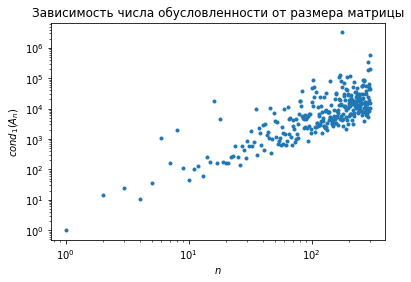

In [5]:
cond_array = []                    # Список чисел обусловленности
for n in size_array:
    matrix = random.randn(n, n)
    cond_array.append(cond(matrix))
plt.title("Зависимость числа обусловленности от размера матрицы")
plt.ylabel("$cond_1(A_n)$")
plt.xlabel("$n$")
plt.loglog(size_array, cond_array, '.')
pass

На графике видно, что большинство точек лежат между двумя прямыми. Так как используем двойную логарифмическую шкалу, прямые являются графиками показательных функций от $n$. Следовательно, в среднем, $cond_1A_n$ растет как показательная функция от $n$. С помощью метода наименьших квадратов найдем $c_1$, $c_2$ и $p$ такие, что для большинства матриц выполняется формула

$$c_1n^p \le cond_1A_n \le c_2n^p $$

Коэффициенты $c_1$ и $c_2$ отвечают за смещение прямых вдоль оси ординат. Коэффициент $p$ - за угол наклона.

Прологарифмируем массивы размеров и чисел обусловленности. С помощью метода наименьших квадратов найдем параметры $p$ и $c$ при которых прямая $c + log_2(n) p$ проходит через середину скопления точек на логарифмированном графике.

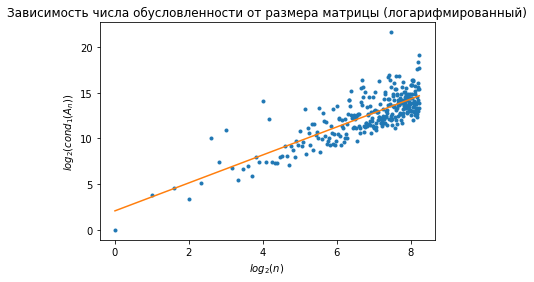

In [6]:
logged_size_array = np.log2(size_array)
logged_cond_array = np.log2(cond_array)

p, c = np.polyfit(logged_size_array, logged_cond_array, 1)

plt.plot(logged_size_array, logged_cond_array, '.')
plt.plot(logged_size_array, c + logged_size_array*p)

plt.title("Зависимость числа обусловленности от размера матрицы (логарифмированный)")
plt.ylabel("$log_2(cond_1(A_n)$)")
plt.xlabel("$log_2(n)$")

pass

Чтобы прямая $c_{mid}n^p$ также проходила через середину скопления точек на графике с логарифмической шкалой нужно домножить коэффициент $c$ на основание логарифма по которому мы логарифмировали (то есть $c_{mid}=2c$)

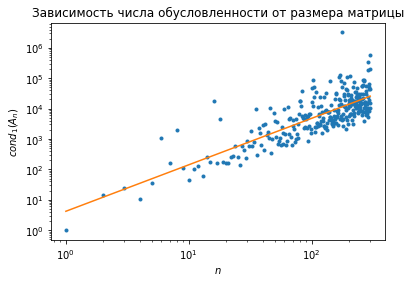

In [7]:
c_mid = 2 * c

plt.loglog(size_array, cond_array, '.')
plt.loglog(size_array, c_mid*size_array**p)

plt.title("Зависимость числа обусловленности от размера матрицы")
plt.ylabel("$cond_1(A_n)$")
plt.xlabel("$n$")

pass

Осталось подобрать коэффициенты $c_1$ и $c_2$ при которых для большинства матриц выполняется формула

$$c_1n^p \le cond_1A_n \le c_2n^p $$

p = 1.5296439842278229 c1 = 0.6953306724457257 c2 = 25.031904208046125 c_mid = 4.171984034674354


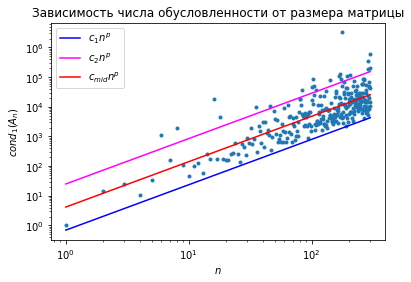

In [10]:
c1 = c_mid / 6
c2 = c_mid * 6

s1 = c1*size_array**p
s2 = c2*size_array**p

plt.loglog(size_array, cond_array, '.')
plt.loglog(size_array, s1, c="blue", label="$c_1n^p$")
plt.loglog(size_array, s2, c="magenta", label="$c_2n^p$")
plt.loglog(size_array, c_mid*size_array**p, c="red", label="$c_{mid}n^p$")
plt.legend()

plt.title("Зависимость числа обусловленности от размера матрицы")
plt.ylabel("$cond_1(A_n)$")
plt.xlabel("$n$")

print(f"{p = } {c1 = } {c2 = } {c_mid = }")

### Вывод

Мы выяснили, что в среднем $\mbox{cond}_1 A_n$ растет как показательная функция от $n$, а именно, что для большинства матриц

$$
c_1 n^p \le \mbox{cond}_1 A_n \le c_2 n^p.
$$

для этого с помощью метода наименьших квадратов мы нашли $c_1$, $c_2$ и $p$.

При $c_1$, $c_2$ = $c_{mid}$ точки будут проходить через середину скопления точек. Следовательно, в среднем, $\mbox{cond}_1 A_n$ растет как функция $c_{mid}n^p$.